In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [3]:
# load dataset
data = pd.read_csv("data.csv")
data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_2039,feature_2040,feature_2041,feature_2042,feature_2043,feature_2044,feature_2045,feature_2046,feature_2047,label
0,0.142170,0.270658,0.172161,0.128419,0.162705,0.011624,0.282096,0.167847,0.012499,0.129094,...,0.034066,0.024912,0.030153,0.323926,0.066432,0.026572,0.165336,0.000000,0.174000,1
1,0.128376,0.248993,0.260346,0.045832,0.206410,0.046443,0.303825,0.147024,0.009290,0.239436,...,0.005309,0.114345,0.090300,0.247387,0.074784,0.017010,0.118286,0.001307,0.218108,0
2,0.237904,0.350561,0.147295,0.065817,0.153813,0.233031,0.158886,0.029988,0.014327,0.222089,...,0.000000,0.007023,0.097333,0.153080,0.043310,0.022119,0.134147,0.004047,0.105774,1
3,0.177536,0.213367,0.180853,0.128782,0.198366,0.000082,0.240751,0.033086,0.009554,0.177033,...,0.001733,0.086853,0.038954,0.141771,0.044282,0.047918,0.172786,0.000000,0.093998,2
4,0.122600,0.170360,0.142664,0.013108,0.158516,0.000460,0.200634,0.000000,0.000000,0.100740,...,0.008589,0.114697,0.065512,0.139558,0.072949,0.002684,0.104563,0.115294,0.107360,0


In [4]:
data.shape

(2060, 2049)

In [5]:
#split dataset in features and target variable
X = data[[col for col in data.columns if col != 'label']] # Features
y = data['label'] # Target variable

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [7]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=8)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [8]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7799352750809061


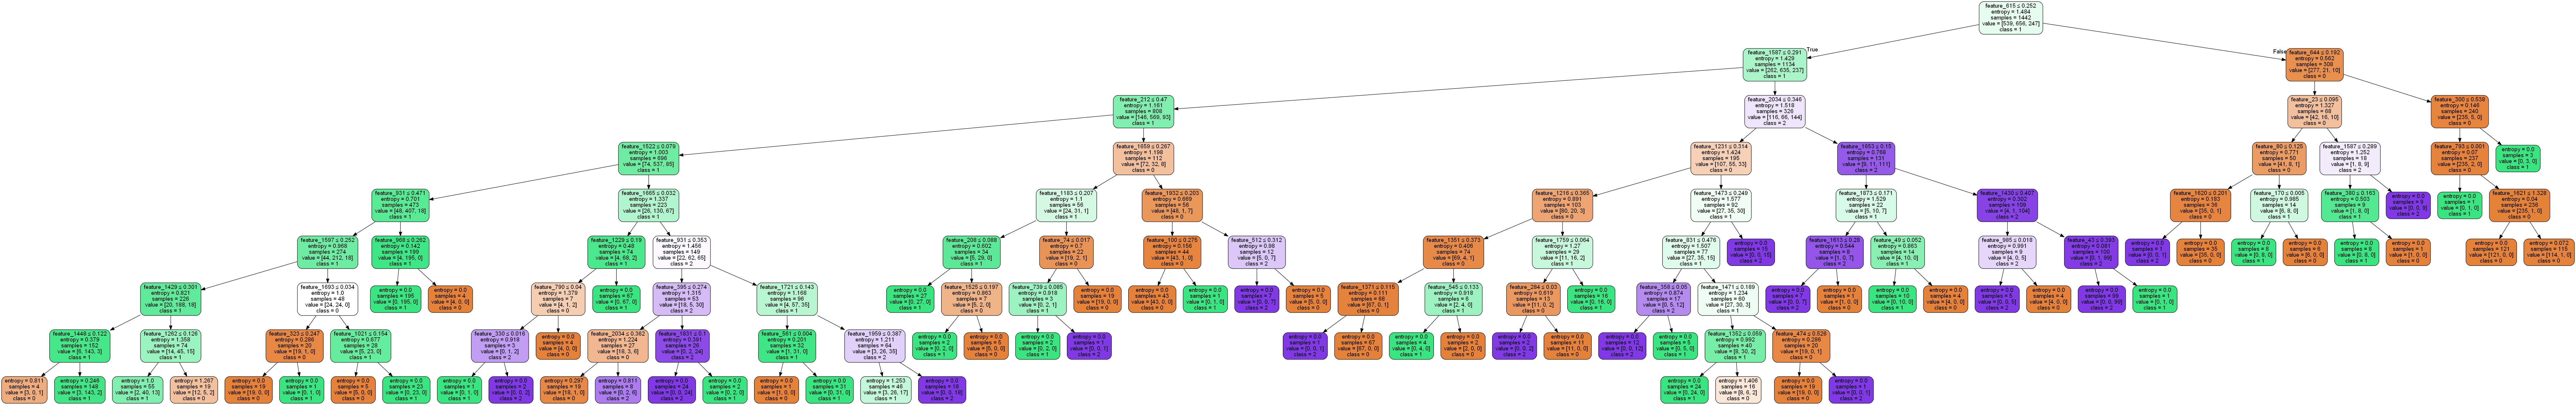

In [9]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns[:len(data.columns)-1],
                class_names=['0','1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

In [12]:
ccc = zip(X.columns[clf.tree_.feature], clf.tree_.threshold, clf.tree_.children_left, clf.tree_.children_right)
for c in ccc:
    print(c)

('feature_615', 0.25164155662059784, 1, 108)
('feature_1587', 0.29085561633110046, 2, 65)
('feature_212', 0.4704795777797699, 3, 46)
('feature_1522', 0.07862420380115509, 4, 23)
('feature_931', 0.4705181270837784, 5, 20)
('feature_1597', 0.2523021847009659, 6, 13)
('feature_1429', 0.3007293790578842, 7, 10)
('feature_1448', 0.12151234969496727, 8, 9)
('feature_2046', -2.0, -1, -1)
('feature_2046', -2.0, -1, -1)
('feature_1262', 0.12649697810411453, 11, 12)
('feature_2046', -2.0, -1, -1)
('feature_2046', -2.0, -1, -1)
('feature_1693', 0.033726081252098083, 14, 17)
('feature_323', 0.2469899207353592, 15, 16)
('feature_2046', -2.0, -1, -1)
('feature_2046', -2.0, -1, -1)
('feature_1021', 0.15368306636810303, 18, 19)
('feature_2046', -2.0, -1, -1)
('feature_2046', -2.0, -1, -1)
('feature_968', 0.26220422983169556, 21, 22)
('feature_2046', -2.0, -1, -1)
('feature_2046', -2.0, -1, -1)
('feature_1665', 0.03202095255255699, 24, 31)
('feature_1229', 0.1904633715748787, 25, 30)
('feature_790', 0.